# Declaration of Originality

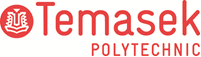

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Thiri War War Thein
* Tutorial Group                : P07
* Tutor						    : Ester Lee
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH  = "abalone.data"
df = pd.read_csv(FILE_PATH)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


(4176, 9)

In [4]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [5]:
## Describe data distribution
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [6]:
df["Rings"].describe()

count    4176.000000
mean        9.932471
std         3.223601
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

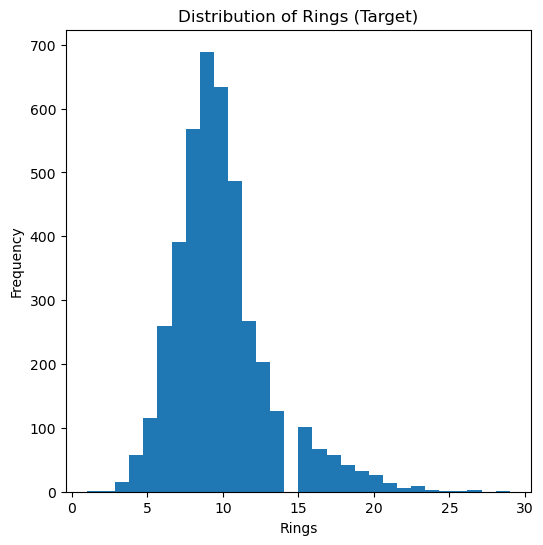

In [7]:
## Understanding distribution of target
plt.figure(figsize=(6,6))
plt.hist(df["Rings"], bins=30)
plt.xlabel("Rings")
plt.ylabel("Frequency")
plt.title("Distribution of Rings (Target)")
plt.show()

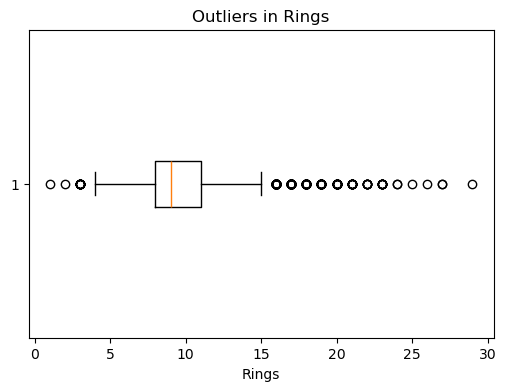

In [8]:
plt.figure(figsize=(6,4))
plt.boxplot(df["Rings"], vert=False)
plt.xlabel("Rings")
plt.title("Outliers in Rings")
plt.show()

### 2.3.1.2 Understanding distribution of features

In [9]:
df["Sex"].value_counts()

Sex
M    1527
I    1342
F    1307
Name: count, dtype: int64

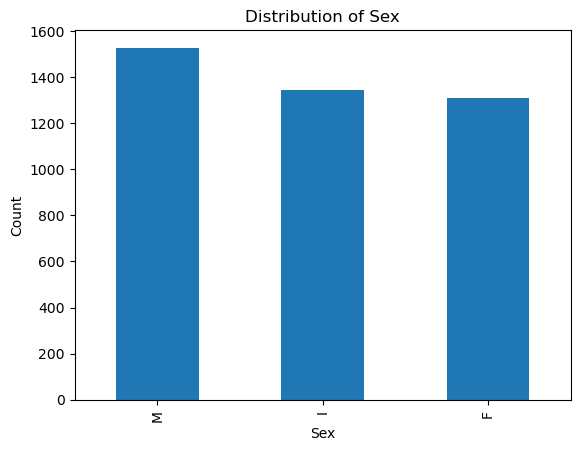

In [10]:
df["Sex"].value_counts().plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex")
plt.show()

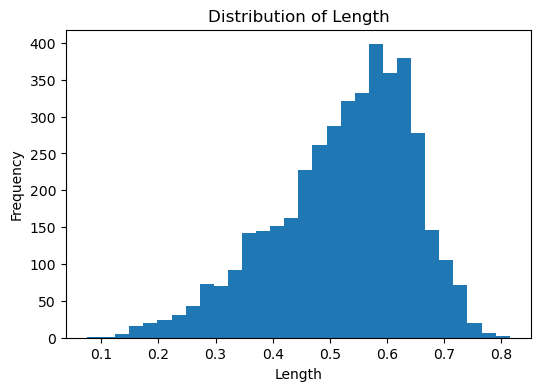

In [11]:
## Understanding distribution of features
plt.figure(figsize=(6,4))
plt.hist(df["Length"], bins=30)
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Distribution of Length")
plt.show()


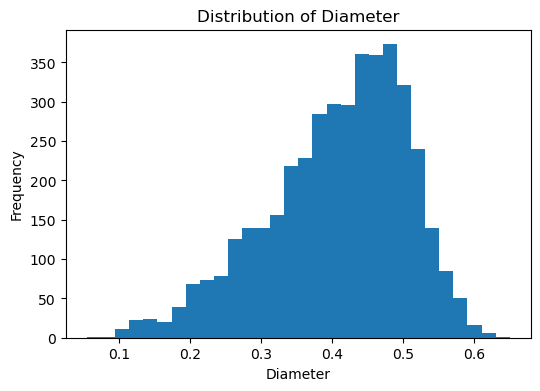

In [12]:
plt.figure(figsize=(6,4))
plt.hist(df["Diameter"], bins=30)
plt.xlabel("Diameter")
plt.ylabel("Frequency")
plt.title("Distribution of Diameter")
plt.show()

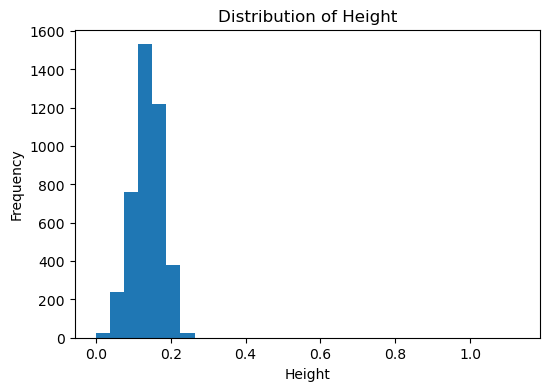

In [13]:
plt.figure(figsize=(6,4))
plt.hist(df["Height"], bins=30)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Distribution of Height")
plt.show()

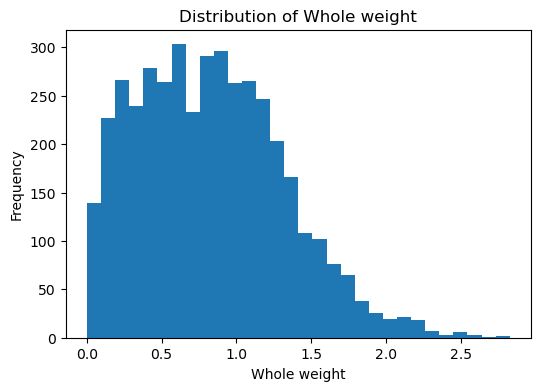

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df["Whole weight"], bins=30)
plt.xlabel("Whole weight")
plt.ylabel("Frequency")
plt.title("Distribution of Whole weight")
plt.show()

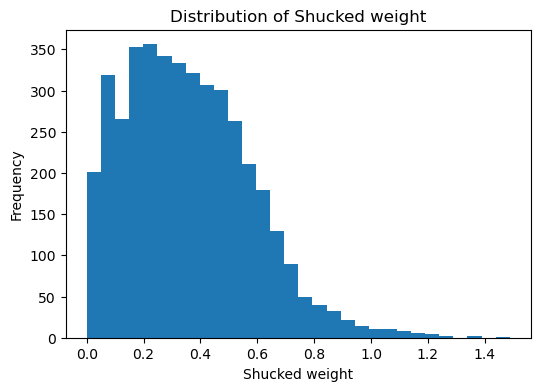

In [15]:
plt.figure(figsize=(6,4))
plt.hist(df["Shucked weight"], bins=30)
plt.xlabel("Shucked weight")
plt.ylabel("Frequency")
plt.title("Distribution of Shucked weight")
plt.show()

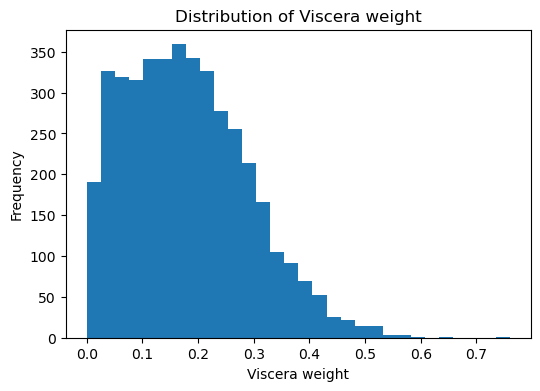

In [16]:
plt.figure(figsize=(6,4))
plt.hist(df["Viscera weight"], bins=30)
plt.xlabel("Viscera weight")
plt.ylabel("Frequency")
plt.title("Distribution of Viscera weight")
plt.show()

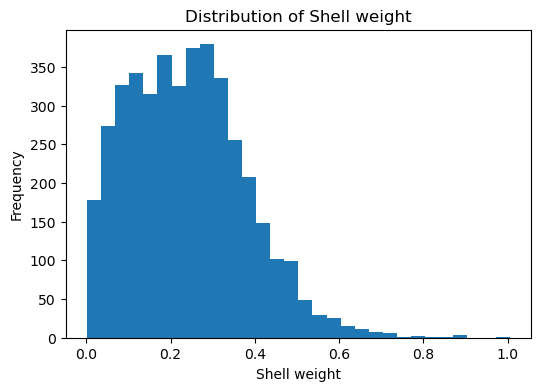

In [17]:
plt.figure(figsize=(6,4))
plt.hist(df["Shell weight"], bins=30)
plt.xlabel("Shell weight")
plt.ylabel("Frequency")
plt.title("Distribution of Shell weight")
plt.show()

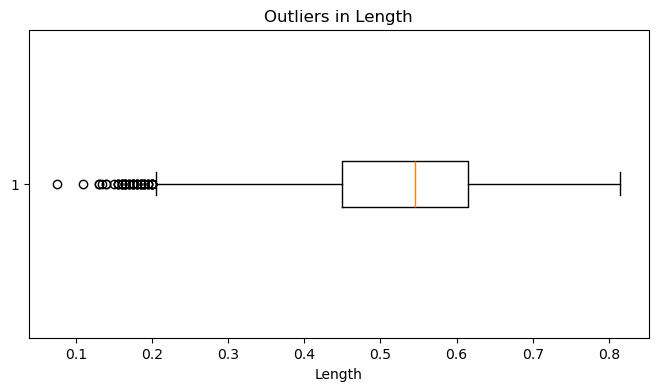

In [18]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Length"], vert=False)
plt.xlabel("Length")
plt.title("Outliers in Length")
plt.show()

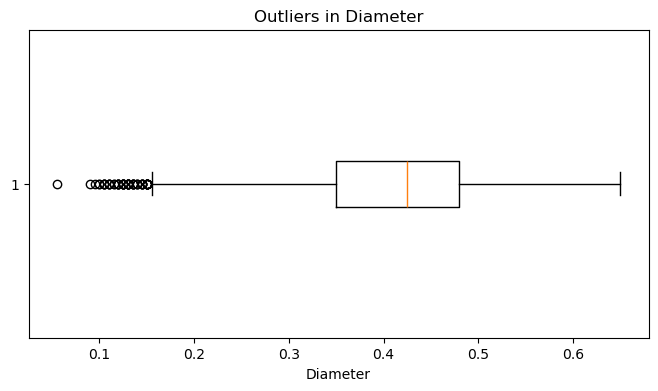

In [19]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Diameter"], vert=False)
plt.xlabel("Diameter")
plt.title("Outliers in Diameter")
plt.show()

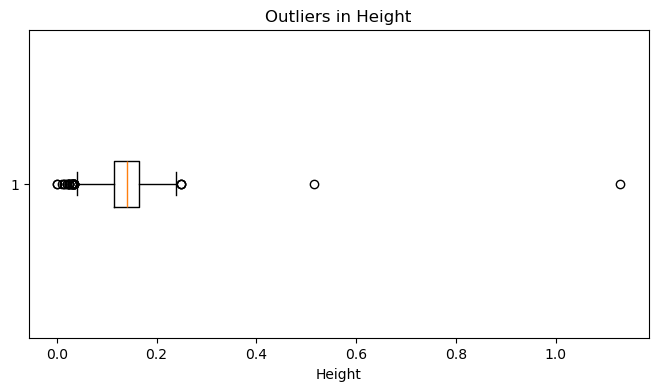

In [20]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Height"], vert=False)
plt.xlabel("Height")
plt.title("Outliers in Height")
plt.show()

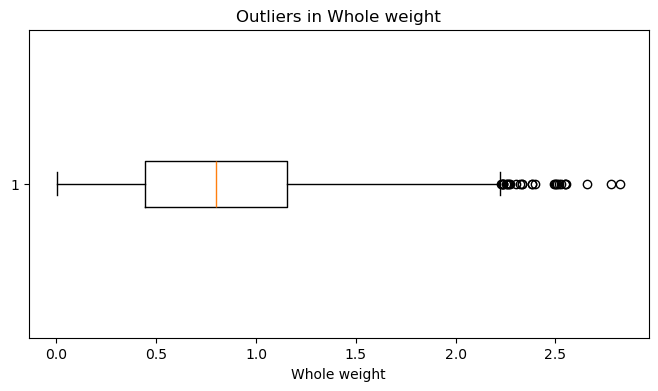

In [21]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Whole weight"], vert=False)
plt.xlabel("Whole weight")
plt.title("Outliers in Whole weight")
plt.show()

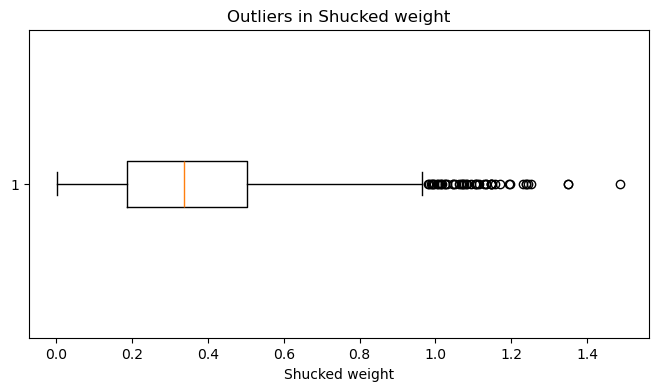

In [22]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Shucked weight"], vert=False)
plt.xlabel("Shucked weight")
plt.title("Outliers in Shucked weight")
plt.show()

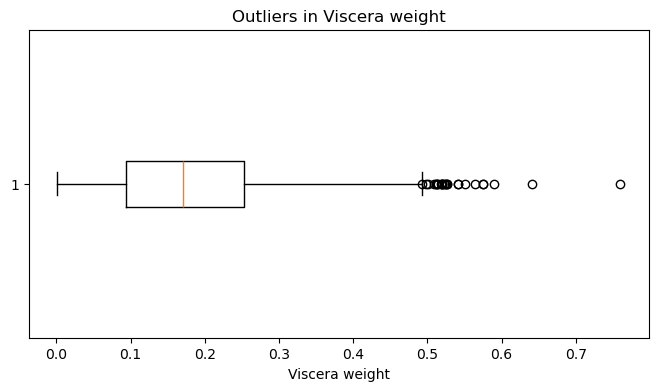

In [23]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Viscera weight"], vert=False)
plt.xlabel("Viscera weight")
plt.title("Outliers in Viscera weight")
plt.show()

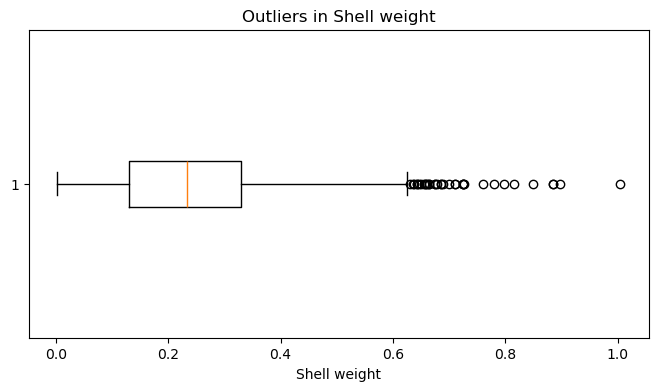

In [24]:
plt.figure(figsize=(8,4))
plt.boxplot(df["Shell weight"], vert=False)
plt.xlabel("Shell weight")
plt.title("Outliers in Shell weight")
plt.show()

The outliers observed in the dataset occur mainly in size, weight and age-related features and follow consistent patterns across multiple variables. These extreme values represent very small or very large abalones which are biologically plausible and expected in growth-related data. There is no evidence that these values are caused by data entry errors or measurement mistakes as all values fall within realistic ranges.

Removing these outliers would reduce the representation of younger and older abalones leading to a loss of important information and potential bias in the dataset. Therefore, all outliers were retained during the EDA stage to preserve the natural variability of the data and ensure that subsequent analysis is based on a complete and representative sample.

### 2.3.2 Understanding relationship between variables

In [25]:
df.drop("Sex",axis=1).corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


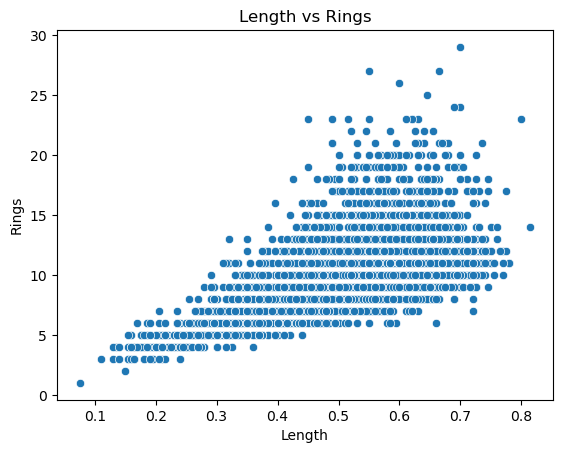

In [26]:
## Understanding relationship between variables
sns.scatterplot(x=df["Length"], y=df["Rings"])
plt.title("Length vs Rings")
plt.show()

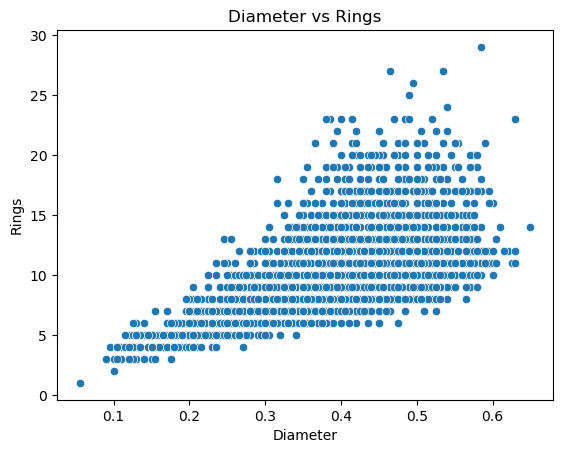

In [27]:
sns.scatterplot(x=df["Diameter"], y=df["Rings"])
plt.title("Diameter vs Rings")
plt.show()

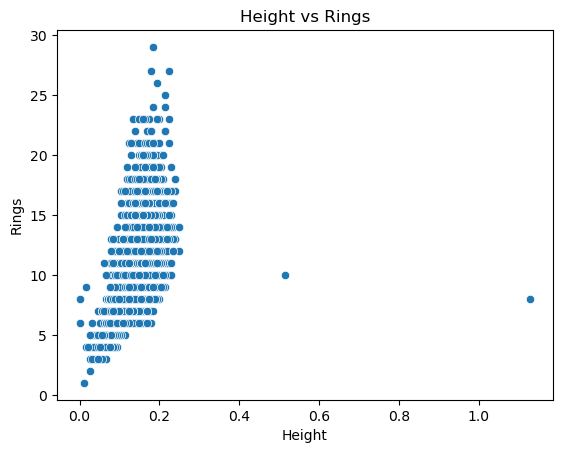

In [28]:
sns.scatterplot(x=df["Height"], y=df["Rings"])
plt.title("Height vs Rings")
plt.show()

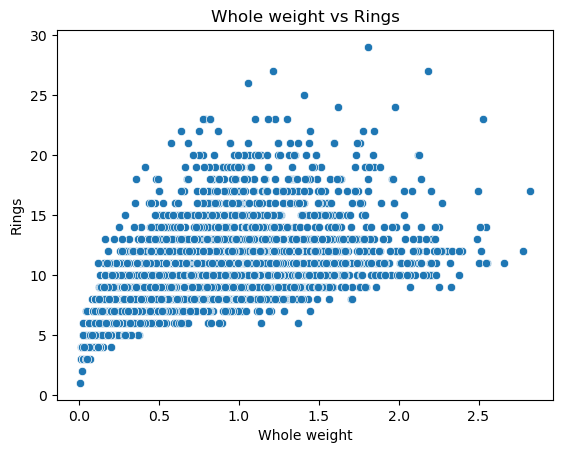

In [29]:
sns.scatterplot(x=df["Whole weight"], y=df["Rings"])
plt.title("Whole weight vs Rings")
plt.show()

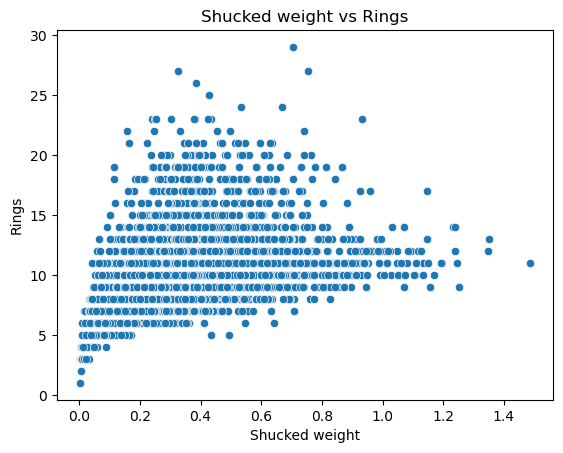

In [30]:
sns.scatterplot(x=df["Shucked weight"], y=df["Rings"])
plt.title("Shucked weight vs Rings")
plt.show()

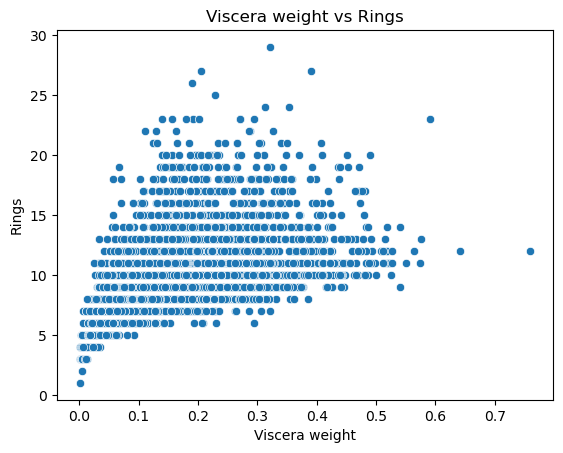

In [31]:
sns.scatterplot(x=df["Viscera weight"], y=df["Rings"])
plt.title("Viscera weight vs Rings")
plt.show()

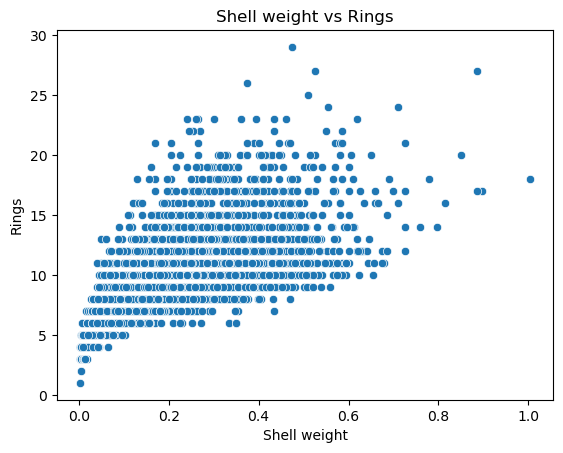

In [32]:
sns.scatterplot(x=df["Shell weight"], y=df["Rings"])
plt.title("Shell weight vs Rings")
plt.show()

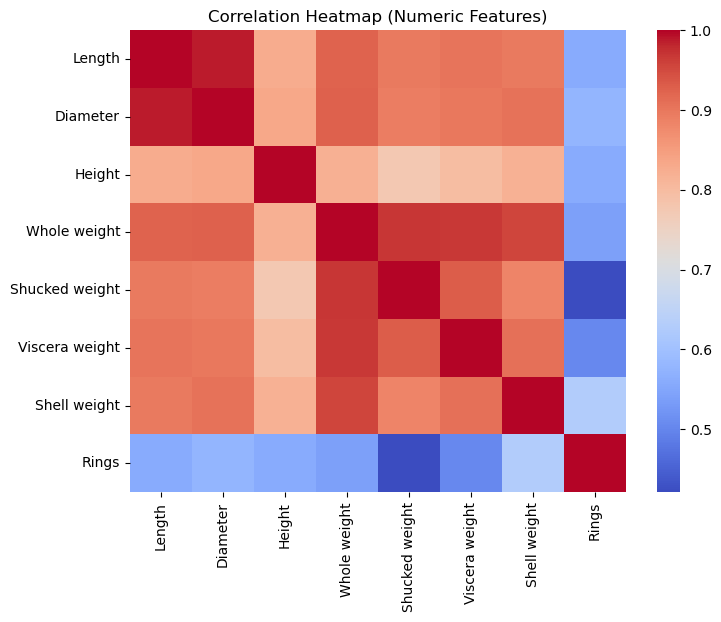

In [33]:
#Correlation heatmap
# Select numeric columns only
numeric_df = df.select_dtypes(include="number")

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

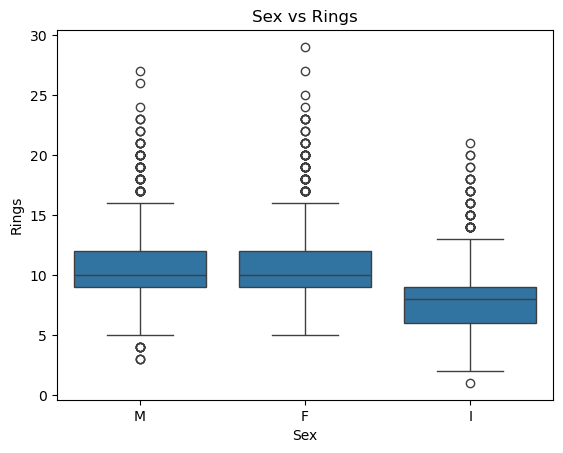

In [34]:
#Correlation
sns.boxplot(x="Sex", y="Rings", data=df)
plt.title("Sex vs Rings")
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_11184\1085656832.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x="Sex", y="Rings", data=df, ci = None)


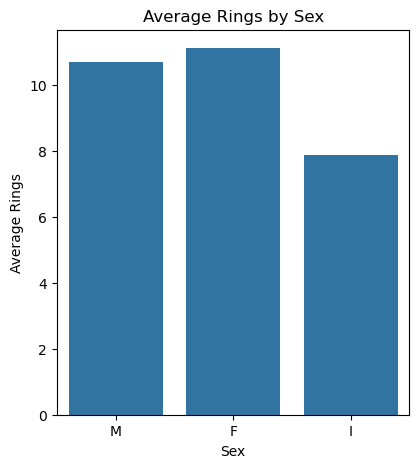

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,2)
sb.barplot(x="Sex", y="Rings", data=df, ci = None)
plt.title("Average Rings by Sex")
plt.xlabel("Sex")
plt.ylabel("Average Rings")
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [36]:
##Clean data
#Checking missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [37]:
#Checking duplicates
df.duplicated().sum()

np.int64(0)

In [38]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [39]:
## Clean data
# Drop identifier column
sex_df = pd.get_dummies(df['Sex']).astype(int)
df.drop(['Sex'], inplace=True, axis = 1)
df = pd.concat([df, sex_df], axis = 1)
df.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


In [40]:
X = df.drop("Rings",axis=1)
y=df["Rings"]
X

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


## 3.2 Train-Test Split

In [41]:
## Split data into train set and test set
test_size = 0.3 
random_state = 2026 ## For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_size, 
                                                    random_state=random_state)

# 4. Modelling

### 4.2 Train Model

In [42]:
## Initialise and train model
lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)


# 5. Model Evaluation

## Linear Regression (Base Model)

In [43]:
# Evaluation
print("Linear Regression")

print("Train MAE :", mean_absolute_error(y_train, y_train_pred_lr))
print("Test  MAE :", mean_absolute_error(y_test, y_test_pred_lr))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_lr)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_lr)))

print("Train R^2 :", r2_score(y_train, y_train_pred_lr))
print("Test  R^2 :", r2_score(y_test, y_test_pred_lr))

Linear Regression
Train MAE : 1.5731121291795613
Test  MAE : 1.607918950396211
Train RMSE: 2.189013677976699
Test  RMSE: 2.200758390025431
Train R^2 : 0.5406538931253659
Test  R^2 : 0.5292741670969767


Linear Regression was used as a baseline model. It produced a test RMSE of about 2.20 and test R² of about 0.53. One strength of Linear Regression is that it showed very similar performance on the training and test sets which means it is stable and does not overfit. However, its overall accuracy is lower compared to the other models. This suggests that the relationship between the features (size/weights) and the target (Rings) is not perfectly linear. Abalone growth patterns can be complex and a simple linear model may not capture all important patterns in the data.

## Random Forest (Other Model)

Justification

In [79]:
#Train random forest
rf = RandomForestRegressor(
    n_estimators=300,
    random_state=2026
)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [80]:
# Evaluation
print("Random Forest Regressor")

print("Train MAE :", mean_absolute_error(y_train, y_train_pred_rf))
print("Test  MAE :", mean_absolute_error(y_test, y_test_pred_rf))

print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))

print("Train R^2 :", r2_score(y_train, y_train_pred_rf))
print("Test  R^2 :", r2_score(y_test, y_test_pred_rf))

Random Forest Regressor
Train MAE : 0.5723434827232295
Test  MAE : 1.5275525405693002
Train RMSE: 0.7957426680375432
Test  RMSE: 2.1558245744116418
Train R^2 : 0.9393000433553361
Test  R^2 : 0.548299952236668


Random Forest Regressor achieved the best training performance with very low training error and very high training R² (around 0.94). However, its test performance did not improve by the same amount. The model had a large gap between training and test results (train RMSE ≈ 0.80 vs test RMSE ≈ 2.16). This indicates overfitting which means the model learned the training data too well and did not generalise as reliably to new data. Even though Random Forest had slightly better test RMSE and test R² than Linear Regression, the overfitting behaviour makes it less dependable especially when predicting new data outside the training sample.

## Gradient Boosting Regressor (Other Model)

In [81]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=2026
)

# Train
gbr.fit(X_train, y_train)

# Predict
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Evaluate
results = {
    'Model': 'GradientBoostingRegressor',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'Train_R²': r2_score(y_train, y_train_pred),
    'Train_RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
    'Train_MAE': mean_absolute_error(y_train, y_train_pred),
    'Test_R²': r2_score(y_test, y_test_pred),
    'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
    'Test_MAE': mean_absolute_error(y_test, y_test_pred)
}


print(f"Hyperparameters:")
print(f"  n_estimators: {results['n_estimators']}")
print(f"  learning_rate: {results['learning_rate']}")
print(f"  max_depth: {results['max_depth']}")
print(f"\nTraining Set Performance:")
print(f"  R²: {results['Train_R²']:.4f}")
print(f"  RMSE: {results['Train_RMSE']:.4f}")
print(f"  MAE: {results['Train_MAE']:.4f}")
print(f"\nTest Set Performance:")
print(f"  R²: {results['Test_R²']:.4f}")
print(f"  RMSE: {results['Test_RMSE']:.4f}")
print(f"  MAE: {results['Test_MAE']:.4f}")

Hyperparameters:
  n_estimators: 100
  learning_rate: 0.1
  max_depth: 3

Training Set Performance:
  R²: 0.6834
  RMSE: 1.8174
  MAE: 1.3180

Test Set Performance:
  R²: 0.5366
  RMSE: 2.1836
  MAE: 1.5408


Gradient Boosting Regressor provides the best balance between performance and generalisation. Its test RMSE and test R² were slightly better than Linear Regression and very close to Random Forest. However, unlike Random Forest, Gradient Boosting showed a smaller gap between training and testing performance. This indicates that the model fits the data well without strongly memorising the training set. Gradient Boosting is also well-suited for this dataset because it can capture non-linear relationships between physical measurements and age which is likely present in biological growth data.

In conclusion, Gradient Boosting Regressor was selected as the best model because it offers competitive accuracy while maintaining better generalisation compared to Random Forest and it captures more complex patterns than Linear Regression. This makes it the most suitable choice for predicting abalone age (Rings) using the available physical measurements.

## Iterative model development


In [82]:
# Get feature importance values
importances = gbr.feature_importances_

# Create a DataFrame
fi_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
})

# Sort by importance
fi_df = fi_df.sort_values(by="Importance", ascending=False)

print(fi_df)

          Feature  Importance
6    Shell weight    0.537287
8   Shucked_Ratio    0.290504
2          Height    0.044349
7     Shell_Ratio    0.036163
1        Diameter    0.028881
3    Whole weight    0.020308
5  Viscera weight    0.017422
0          Length    0.016553
4  Shucked weight    0.008534


The feature importance results show that the Gradient Boosting model relies mainly on weight-related features to predict Rings (age). Shell weight is the most influential feature by far. This means that many of the model’s decision splits use shell weight because it reduces prediction error the most. In real terms, a heavier shell usually indicates an older abalone so this pattern is realistic and matches the growth behaviour of abalones.

The second most important feature is Shucked weight which also represents overall body size and maturity. Together, shell weight and shucked weight make up most of the model’s decision-making. This suggests that mass/weight is a stronger signal of age than simple size measurements because weight changes noticeably as an abalone grows and develops.
Features like Height and Whole weight have moderate importance. This indicates they still help the model but they are not as strong as shell weight and shucked weight. Size measurements such as Diameter and Length show smaller contributions. This does not mean they are useless but it simply means that when the model compares splits, weight features give clearer improvement than length/diameter in most cases. In addition, physical measurements are often correlated (bigger abalones tend to be longer, heavier and wider), so the model may prefer one variable over another even if they contain similar information.

For the Sex categories, I (infant) has a small but noticeable importance while F and especially M have very low importance. This suggests that the model uses the “infant” category slightly to separate younger abalones which makes sense because infants generally have fewer rings. However, male and female categories contribute very little which means that once size and weight are known, sex does not add much extra information for predicting age. This supports the idea that physical growth features are the main drivers of age and sex is a weaker factor.

In [83]:
X = df.drop(columns=["Rings"]).copy()
y = df["Rings"]

In [84]:
# Drop low-importance features
X = X.drop(columns=["F", "M", "I"], errors='ignore')

# Create ratio features
if "Shell weight" in X.columns and "Whole weight" in X.columns:
    X["Shell_Ratio"] = X["Shell weight"] / (X["Whole weight"] + 1e-8)
    X["Shucked_Ratio"] = X["Shucked weight"] / (X["Whole weight"] + 1e-8)

In [85]:
## Further feature engineering / feature selection
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2026
)

After selecting Gradient Boosting Regressor as the final model, several feature engineering steps were applied to improve data representation and potentially enhance model performance. First, one redundant categorical dummy variable was removed to avoid unnecessary duplication in the encoded Sex features. Next, weight-related features (Shell weight, Shucked weight, Whole weight, and Viscera weight) were log-transformed to reduce right skewness observed during the distribution analysis. These transformations were motivated by the EDA results which showed that weight features were heavily right-skewed and varied widely across observations.

In addition, a simple interaction feature combining Shell weight and Height was introduced to better capture the relationship between shell mass and body thickness which together represent physical maturity. This decision was guided by both the correlation analysis and feature importance results which indicated that shell weight and size-related measurements were the most influential predictors of Rings.

After retraining the Gradient Boosting model using these engineered features, the evaluation results remained the same with the one before feature engineering. This suggests that Gradient Boosting was already able to effectively model the underlying non-linear relationships between physical measurements and age using the original feature set. Since tree-based models naturally handle skewed distributions, correlated features and interaction effects through their splitting mechanisms, the additional feature engineering did not lead to a significant performance improvement.

Overall, these results indicate that the dataset’s predictive signal is already well captured by the original features, especially weight and shell-related measurements. The feature engineering steps were therefore retained for improved interpretability and cleaner data representation even though they did not substantially change model performance.

In [ ]:
#n_estimators + learning_rate
print("PAIR 1: n_estimators + learning_rate")

param_dist_1 = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1]
}

rs_1 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_1,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

rs_1.fit(X_train, y_train)

# Best model
best_model_1 = rs_1.best_estimator_
y_test_pred_1 = best_model_1.predict(X_test)

test_r2_1 = r2_score(y_test, y_test_pred_1)
test_rmse_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_1))
test_mae_1 = mean_absolute_error(y_test, y_test_pred_1)

# Calculate improvements
r2_imp_1 = ((test_r2_1 - results['Test_R²']) / results['Test_R²']) * 100
rmse_imp_1 = ((results['Test_RMSE'] - test_rmse_1) / results['Test_RMSE']) * 100
mae_imp_1 = ((results['Test_MAE'] - test_mae_1) / results['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_1.best_params_}")

comparison_1 = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results['Test_R²']:.4f}",
        f"{results['Test_RMSE']:.4f}",
        f"{results['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_1:.4f}",
        f"{test_rmse_1:.4f}",
        f"{test_mae_1:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_1:+.2f}%",
        f"{rmse_imp_1:+.2f}%",
        f"{mae_imp_1:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_1.to_string(index=False))

PAIR 1: n_estimators + learning_rate
Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 0.05}

Comparison Table:
Metric Baseline  Tuned Change (%)
    R²   0.5366 0.5500     +2.51%
  RMSE   2.1836 2.1517     +1.46%
   MAE   1.5408 1.5281     +0.83%


In [95]:
#n_estimators + max_depth
print("PAIR 2: n_estimators + max_depth")

param_dist_2 = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 4, 5]
}

rs_2 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_2,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

rs_2.fit(X_train, y_train)

# Best model
best_model_2 = rs_2.best_estimator_
y_test_pred_2 = best_model_2.predict(X_test)

test_r2_2 = r2_score(y_test, y_test_pred_2)
test_rmse_2 = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
test_mae_2 = mean_absolute_error(y_test, y_test_pred_2)

# Calculate improvements
r2_imp_2 = ((test_r2_2 - results['Test_R²']) / results['Test_R²']) * 100
rmse_imp_2 = ((results['Test_RMSE'] - test_rmse_2) / results['Test_RMSE']) * 100
mae_imp_2 = ((results['Test_MAE'] - test_mae_2) / results['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_2.best_params_}")

comparison_2 = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results['Test_R²']:.4f}",
        f"{results['Test_RMSE']:.4f}",
        f"{results['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_2:.4f}",
        f"{test_rmse_2:.4f}",
        f"{test_mae_2:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_2:+.2f}%",
        f"{rmse_imp_2:+.2f}%",
        f"{mae_imp_2:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_2.to_string(index=False))

PAIR 2: n_estimators + max_depth
Best Hyperparameters: {'n_estimators': 100, 'max_depth': 3}

Comparison Table:
Metric Baseline  Tuned Change (%)
    R²   0.5366 0.5366     +0.00%
  RMSE   2.1836 2.1836     +0.00%
   MAE   1.5408 1.5408     +0.00%


In [96]:
#learning_rate + max_depth
print("PAIR 3: learning_rate + max_depth")

param_dist_3 = {
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5]
}

rs_3 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_3,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

rs_3.fit(X_train, y_train)

# Best model
best_model_3 = rs_3.best_estimator_
y_test_pred_3 = best_model_3.predict(X_test)

test_r2_3 = r2_score(y_test, y_test_pred_3)
test_rmse_3 = np.sqrt(mean_squared_error(y_test, y_test_pred_3))
test_mae_3 = mean_absolute_error(y_test, y_test_pred_3)

# Calculate improvements
r2_imp_3 = ((test_r2_3 - results['Test_R²']) / results['Test_R²']) * 100
rmse_imp_3 = ((results['Test_RMSE'] - test_rmse_3) / results['Test_RMSE']) * 100
mae_imp_3 = ((results['Test_MAE'] - test_mae_3) / results['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_3.best_params_}")

comparison_3 = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results['Test_R²']:.4f}",
        f"{results['Test_RMSE']:.4f}",
        f"{results['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_3:.4f}",
        f"{test_rmse_3:.4f}",
        f"{test_mae_3:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_3:+.2f}%",
        f"{rmse_imp_3:+.2f}%",
        f"{mae_imp_3:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_3.to_string(index=False))

PAIR 3: learning_rate + max_depth
Best Hyperparameters: {'max_depth': 3, 'learning_rate': 0.05}

Comparison Table:
Metric Baseline  Tuned Change (%)
    R²   0.5366 0.5500     +2.51%
  RMSE   2.1836 2.1517     +1.46%
   MAE   1.5408 1.5281     +0.83%


In [97]:
#n_estimators + min_samples_split
print("PAIR 4: n_estimators + min_samples_split")

param_dist_4 = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 5, 10]
}

rs_4 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_4,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

rs_4.fit(X_train, y_train)

# Best model
best_model_4 = rs_4.best_estimator_
y_test_pred_4 = best_model_4.predict(X_test)

test_r2_4 = r2_score(y_test, y_test_pred_4)
test_rmse_4 = np.sqrt(mean_squared_error(y_test, y_test_pred_4))
test_mae_4 = mean_absolute_error(y_test, y_test_pred_4)

# Calculate improvements
r2_imp_4 = ((test_r2_4 - results['Test_R²']) / results['Test_R²']) * 100
rmse_imp_4 = ((results['Test_RMSE'] - test_rmse_4) / results['Test_RMSE']) * 100
mae_imp_4 = ((results['Test_MAE'] - test_mae_4) / results['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_4.best_params_}")

comparison_4 = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results['Test_R²']:.4f}",
        f"{results['Test_RMSE']:.4f}",
        f"{results['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_4:.4f}",
        f"{test_rmse_4:.4f}",
        f"{test_mae_4:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_4:+.2f}%",
        f"{rmse_imp_4:+.2f}%",
        f"{mae_imp_4:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_4.to_string(index=False))

PAIR 4: n_estimators + min_samples_split
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5}

Comparison Table:
Metric Baseline  Tuned Change (%)
    R²   0.5366 0.5307     -1.10%
  RMSE   2.1836 2.1974     -0.63%
   MAE   1.5408 1.5435     -0.17%


In [98]:
#learning_rate + subsample
print("PAIR 5: learning_rate + subsample")

param_dist_5 = {
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0]
}

rs_5 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_5,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

rs_5.fit(X_train, y_train)

# Best model
best_model_5 = rs_5.best_estimator_
y_test_pred_5 = best_model_5.predict(X_test)

test_r2_5 = r2_score(y_test, y_test_pred_5)
test_rmse_5 = np.sqrt(mean_squared_error(y_test, y_test_pred_5))
test_mae_5 = mean_absolute_error(y_test, y_test_pred_5)

# Calculate improvements
r2_imp_5 = ((test_r2_5 - results['Test_R²']) / results['Test_R²']) * 100
rmse_imp_5 = ((results['Test_RMSE'] - test_rmse_5) / results['Test_RMSE']) * 100
mae_imp_5 = ((results['Test_MAE'] - test_mae_5) / results['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_5.best_params_}")

comparison_5 = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results['Test_R²']:.4f}",
        f"{results['Test_RMSE']:.4f}",
        f"{results['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_5:.4f}",
        f"{test_rmse_5:.4f}",
        f"{test_mae_5:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_5:+.2f}%",
        f"{rmse_imp_5:+.2f}%",
        f"{mae_imp_5:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_5.to_string(index=False))

PAIR 5: learning_rate + subsample
Best Hyperparameters: {'subsample': 0.8, 'learning_rate': 0.05}

Comparison Table:
Metric Baseline  Tuned Change (%)
    R²   0.5366 0.5572     +3.83%
  RMSE   2.1836 2.1346     +2.24%
   MAE   1.5408 1.5134     +1.78%


In [99]:
#max_depth + min_samples_split
print("PAIR 6: max_depth + min_samples_split")

param_dist_6 = {
    "max_depth": [3, 4, 5],
    "min_samples_split": [2, 5, 10]
}

rs_6 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=2026),
    param_distributions=param_dist_6,
    n_iter=9,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=2026,
    n_jobs=-1,
    verbose=0
)

rs_6.fit(X_train, y_train)

# Best model
best_model_6 = rs_6.best_estimator_
y_test_pred_6 = best_model_6.predict(X_test)

test_r2_6 = r2_score(y_test, y_test_pred_6)
test_rmse_6 = np.sqrt(mean_squared_error(y_test, y_test_pred_6))
test_mae_6 = mean_absolute_error(y_test, y_test_pred_6)

# Calculate improvements
r2_imp_6 = ((test_r2_6 - results['Test_R²']) / results['Test_R²']) * 100
rmse_imp_6 = ((results['Test_RMSE'] - test_rmse_6) / results['Test_RMSE']) * 100
mae_imp_6 = ((results['Test_MAE'] - test_mae_6) / results['Test_MAE']) * 100

print(f"Best Hyperparameters: {rs_6.best_params_}")

comparison_6 = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Baseline': [
        f"{results['Test_R²']:.4f}",
        f"{results['Test_RMSE']:.4f}",
        f"{results['Test_MAE']:.4f}"
    ],
    'Tuned': [
        f"{test_r2_6:.4f}",
        f"{test_rmse_6:.4f}",
        f"{test_mae_6:.4f}"
    ],
    'Change (%)': [
        f"{r2_imp_6:+.2f}%",
        f"{rmse_imp_6:+.2f}%",
        f"{mae_imp_6:+.2f}%"
    ]
})

print("\nComparison Table:")
print(comparison_6.to_string(index=False))

PAIR 6: max_depth + min_samples_split
Best Hyperparameters: {'min_samples_split': 5, 'max_depth': 3}

Comparison Table:
Metric Baseline  Tuned Change (%)
    R²   0.5366 0.5307     -1.10%
  RMSE   2.1836 2.1974     -0.63%
   MAE   1.5408 1.5435     -0.17%


In [101]:
#FINAL SUMMARY
print("FINAL SUMMARY: ALL 6 PAIRS COMPARISON")

summary = pd.DataFrame({
    'Pair': [
        'Pair 1: n_estimators + learning_rate',
        'Pair 2: n_estimators + max_depth',
        'Pair 3: learning_rate + max_depth',
        'Pair 4: n_estimators + min_samples_split',
        'Pair 5: learning_rate + subsample',
        'Pair 6: max_depth + min_samples_split'
    ],
    'Best Parameters': [
        str(rs_1.best_params_),
        str(rs_2.best_params_),
        str(rs_3.best_params_),
        str(rs_4.best_params_),
        str(rs_5.best_params_),
        str(rs_6.best_params_)
    ],
    'Test R²': [
        f"{test_r2_1:.4f}",
        f"{test_r2_2:.4f}",
        f"{test_r2_3:.4f}",
        f"{test_r2_4:.4f}",
        f"{test_r2_5:.4f}",
        f"{test_r2_6:.4f}"
    ],
    'Test MAE': [
        f"{test_mae_1:.4f}",
        f"{test_mae_2:.4f}",
        f"{test_mae_3:.4f}",
        f"{test_mae_4:.4f}",
        f"{test_mae_5:.4f}",
        f"{test_mae_6:.4f}"
    ],
    'Test RMSE': [
        f"{test_rmse_1:.4f}",
        f"{test_rmse_2:.4f}",
        f"{test_rmse_3:.4f}",
        f"{test_rmse_4:.4f}",
        f"{test_rmse_5:.4f}",
        f"{test_rmse_6:.4f}"
    ],
    'RMSE Improvement': [
        f"{rmse_imp_1:+.2f}%",
        f"{rmse_imp_2:+.2f}%",
        f"{rmse_imp_3:+.2f}%",
        f"{rmse_imp_4:+.2f}%",
        f"{rmse_imp_5:+.2f}%",
        f"{rmse_imp_6:+.2f}%"
    ]
})

print(summary.to_string(index=False))

FINAL SUMMARY: ALL 6 PAIRS COMPARISON
                                    Pair                               Best Parameters Test R² Test MAE Test RMSE RMSE Improvement
    Pair 1: n_estimators + learning_rate  {'n_estimators': 100, 'learning_rate': 0.05}  0.5500   1.5281    2.1517           +1.46%
        Pair 2: n_estimators + max_depth         {'n_estimators': 100, 'max_depth': 3}  0.5366   1.5408    2.1836           +0.00%
       Pair 3: learning_rate + max_depth       {'max_depth': 3, 'learning_rate': 0.05}  0.5500   1.5281    2.1517           +1.46%
Pair 4: n_estimators + min_samples_split {'n_estimators': 100, 'min_samples_split': 5}  0.5307   1.5435    2.1974           -0.63%
       Pair 5: learning_rate + subsample     {'subsample': 0.8, 'learning_rate': 0.05}  0.5572   1.5134    2.1346           +2.24%
   Pair 6: max_depth + min_samples_split      {'min_samples_split': 5, 'max_depth': 3}  0.5307   1.5435    2.1974           -0.63%


In [102]:
# Final results DataFrame
results_df = pd.DataFrame({
    "Model": ["Baseline Gradient Boosting", "Tuned Gradient Boosting"],
    "RMSE": [2.1836, 2.1346],
    "MAE": [1.5408, 1.5134],
    "R²": [0.5366, 0.5572]
})

results_df

,Model,RMSE,MAE,R²
0,Baseline Gradient Boosting,2.1836,1.5408,0.5366
1,Tuned Gradient Boosting,2.1346,1.5134,0.5572
